In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!which python

/home/tarun/anaconda3/bin/python


In [2]:
data=pd.read_csv("Wholesale customers data.csv")
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


In [4]:
data.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [5]:
#No null or missing values are there 

In [6]:
data.describe(include="all")

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [7]:
#There are some values which are very high so need scaling of the data

In [8]:
X=data.iloc[:,[3,4,6,7]].values

In [9]:
X

array([[ 9656,  7561,  2674,  1338],
       [ 9810,  9568,  3293,  1776],
       [ 8808,  7684,  3516,  7844],
       ...,
       [15488, 30243, 14841,  1867],
       [ 1981,  2232,   168,  2125],
       [ 1698,  2510,   477,    52]])

In [10]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)

In [11]:
X

array([[ 0.52356777, -0.04111489, -0.04356873, -0.06633906],
       [ 0.54445767,  0.17031835,  0.08640684,  0.08915105],
       [ 0.40853771, -0.0281571 ,  0.13323164,  2.24329255],
       ...,
       [ 1.31467078,  2.34838631,  2.51121768,  0.12145607],
       [-0.51753572, -0.60251388, -0.56977032,  0.21304614],
       [-0.5559243 , -0.57322717, -0.50488752, -0.52286938]])

In [12]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs

In [13]:
db=DBSCAN(eps=0.5,min_samples=20).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [14]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [15]:
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 1
Estimated number of noise points: 106


In [16]:
labels=db.labels_
labels

array([ 0,  0, -1,  0, -1,  0,  0,  0,  0, -1,  0,  0, -1, -1,  0,  0,  0,
       -1,  0,  0,  0,  0, -1, -1, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0, -1, -1,  0, -1,  0, -1, -1,  0, -1, -1, -1,  0, -1,  0,
        0,  0,  0,  0,  0, -1, -1,  0,  0,  0, -1,  0, -1,  0, -1,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0,
       -1, -1, -1,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0, -1, -1,
        0,  0,  0,  0,  0, -1,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1, -1,  0,  0, -1,  0,  0,  0, -1,  0, -1, -1,  0,  0,  0,
       -1, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1,  0,  0,  0,
       -1, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1, -1, -1,  0,
        0, -1,  0,  0,  0, -1,  0, -1,  0,  0,  0, -1, -1,  0, -1,  0,  0,
        0,  0,  0,  0,  0

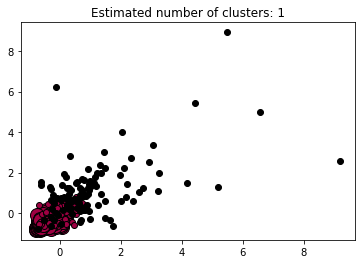

In [17]:
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [18]:
X=data.iloc[:,[3,4]].values

In [19]:
X

array([[ 9656,  7561],
       [ 9810,  9568],
       [ 8808,  7684],
       [ 1196,  4221],
       [ 5410,  7198],
       [ 8259,  5126],
       [ 3199,  6975],
       [ 4956,  9426],
       [ 3648,  6192],
       [11093, 18881],
       [ 5403, 12974],
       [ 1124,  4523],
       [12319, 11757],
       [ 6208, 14982],
       [ 9465, 12091],
       [ 1114,  3821],
       [ 8816, 12121],
       [ 6157,  2933],
       [ 6327, 10099],
       [ 2495,  9464],
       [ 4519,  4602],
       [  871,  2010],
       [ 1917,  4469],
       [36423, 22019],
       [ 9776, 13792],
       [ 4230,  7595],
       [  961,  2861],
       [  803,  3045],
       [20484, 25957],
       [ 2100,  2609],
       [ 3610, 11107],
       [ 4339,  3133],
       [ 1318,  2886],
       [ 4786,  7326],
       [ 1979,  2262],
       [ 5491, 11091],
       [ 4362,  5428],
       [10556, 12477],
       [15729, 16709],
       [  555,   902],
       [ 4332,  4757],
       [ 3065,  5956],
       [ 7555, 14961],
       [110

In [20]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)

In [21]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs

In [22]:
db=DBSCAN(eps=0.5,min_samples=20).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [23]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [24]:
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 1
Estimated number of noise points: 43


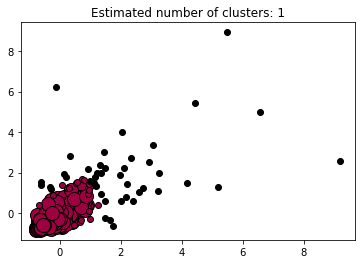

In [25]:
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()